#### Name: Abdur Rahman
#### Student ID: 250975

In [89]:
# import libraries
import scipy.fft
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task 1. Load the attached data from .csv file into a numpy array. Plot both measured and simulated acceleration data on top of each other. Also plot the difference a_sim - a_meas. Discuss in your report any similarity between the two data columns.

In [155]:
# Loading data
df = pd.read_csv("data.csv") # Loadind data with pandas due to convenience
# df = pd.DataFrame(df) # turning data into pandas DataFrame
# df.info()

In [156]:
df.head()

,a_meas;a_sim;
0,0.08000;0.06327;
1,-0.12000;0.06329;
2,0.00000;0.06331;
3,0.27000;0.06333;
4,0.08000;0.06335;


Both columns seem to be combined in a single column. They need to be seperated.

In [216]:
df = pd.read_csv('data.csv',sep=';')
df.head()

,a_meas,a_sim,Unnamed: 2
0,0.08,0.06327,NaN
1,-0.12,0.06329,NaN
2,0.00,0.06331,NaN
3,0.27,0.06333,NaN
4,0.08,0.06335,NaN


In [217]:
# Dropping the extra columns created during seperation
df = df.drop("Unnamed: 2", axis=1)
df.head()

,a_meas,a_sim
0,0.08,0.06327
1,-0.12,0.06329
2,0.00,0.06331
3,0.27,0.06333
4,0.08,0.06335


In [159]:
df.to_csv("data1.csv") # making a backup of the modified dataset

### Plotting measured acceleration data and simulated acceleration data on top of each other

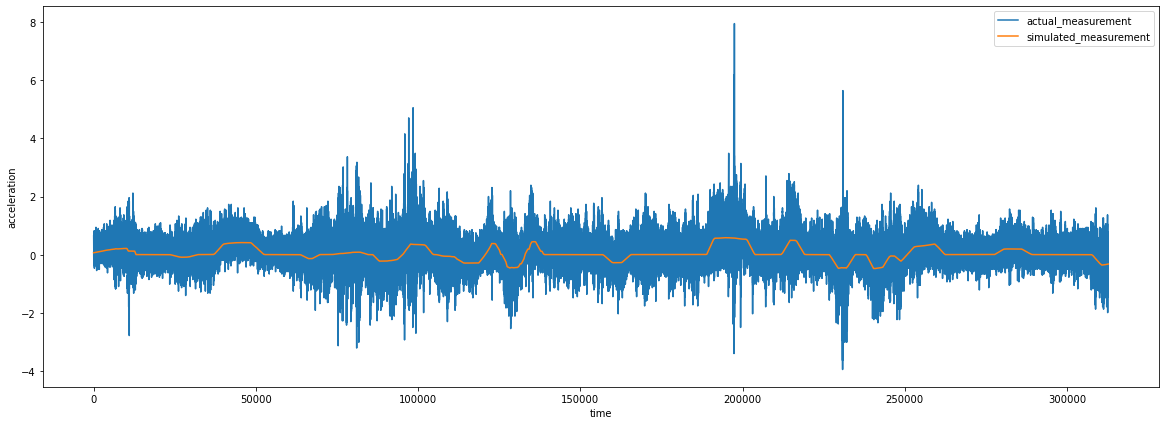

In [203]:
plt.figure(figsize=(20,7))
plt.plot(df["a_meas"], label="actual_measurement")
plt.plot(df["a_sim"], label="simulated_measurement")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend()
plt.show()

### **Comment:** The simulated data seems to very low in amplitude compared to measured data. But the patterns match. it can be observed that where the measure data has shown peaks in the plot; the simulated data has also shown rise in acceleration for a good period of time. And same goes for low values.

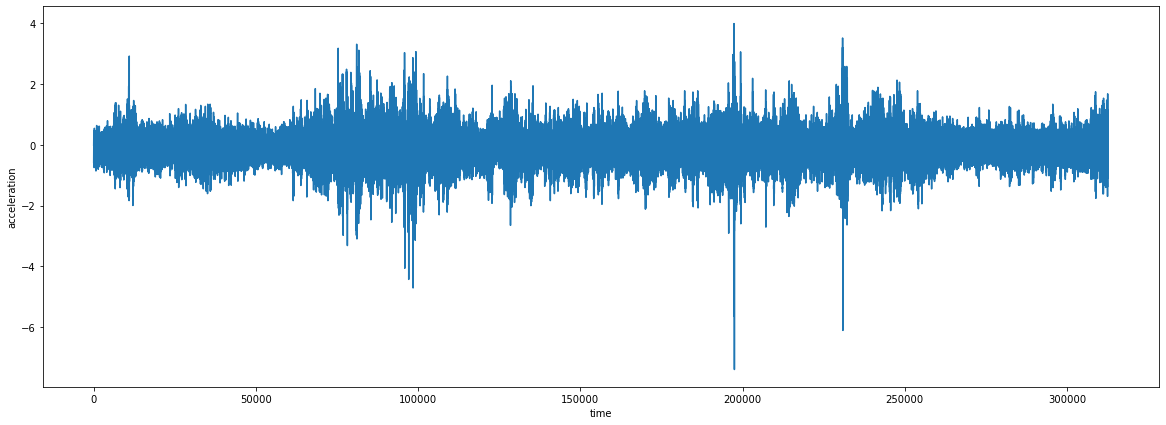

In [202]:
# the difference a_sim - a_meas

plt.figure(figsize=(20,7))
plt.plot(df["a_sim"]-df["a_meas"])
plt.xlabel("time")
plt.ylabel("acceleration")
plt.show()

**Comment:** The subtraction does not give an evenly distributed plot

## Task 2. Run FFT on the acceleration data. What does the resulting frequency spectra tell you? Can you, based on the source of the data (moving train), give a physical explanation of the results?

#### FFT  on the measured acceleration data

In [176]:
#scipy.fft.fft(s) failed test of fft
s1 = pd.DataFrame(df["a_meas"]) # Turning the column into a pandas DataFrame as fft could not be performed directly.
s2 = pd.DataFrame(df["a_sim"])

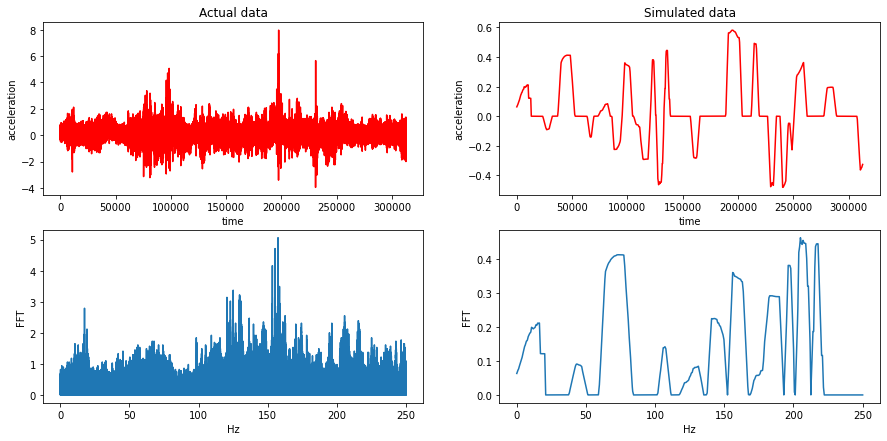

In [214]:

sr = 500 # sampling rate (Hz)
X = scipy.fft.fft(s1) # fft performed
n = np.arange(len(X)) #length of fft
T = len(X)/sr # sampling period
x_freq = n/T

plt.figure(figsize=(15,7))
plt.subplot(2, 2, 1)
plt.plot(s, 'r')
plt.xlabel("time")
plt.ylabel("acceleration")
plt.title("Actual data")

plt.subplot(2, 2, 3)
plt.plot(x_freq[:len(X)//2+1], np.abs(X[:len(X)//2+1]))
plt.xlabel("Hz")
plt.ylabel("FFT")
#plt.show()


X2 = scipy.fft.fft(s2) # fft performed
n2 = np.arange(len(X2)) #length of fft
T2 = len(X2)/sr # sampling period
x_freq2=n2/T2


plt.subplot(2, 2, 2)
plt.plot(s2, 'r')
plt.xlabel("time")
plt.ylabel("acceleration")
plt.title("Simulated data")

plt.subplot(2, 2, 4)
plt.plot(x_freq2[:len(X2)//2+1], np.abs(X2[:len(X2)//2+1]))
plt.xlabel("Hz")
plt.ylabel("FFT")
plt.show()



### **Comment:** The sudden peaks could signify defects in the rail road or they could also mean that in those periods, the rail track was almost straght. Thus the increase on acceleration. The extreme highs and lows that match with the simulated data should be normal opration. On the other hand, the extreme highs and lows that do not match with the simualted data should represent some sort of abnormalities which could be linked to demormations in the rail track. 

## Task 3. Subtract simulated data from measured data. Run FFT again on the difference between measured and simulated data. Compare the resulting spectra to that in task 1. Is there any difference? If so, explain the difference in information content.

#### FFT on the difference of the simulated and measured data

In [208]:
s3 = pd.DataFrame(df["a_sim"]-df["a_meas"])

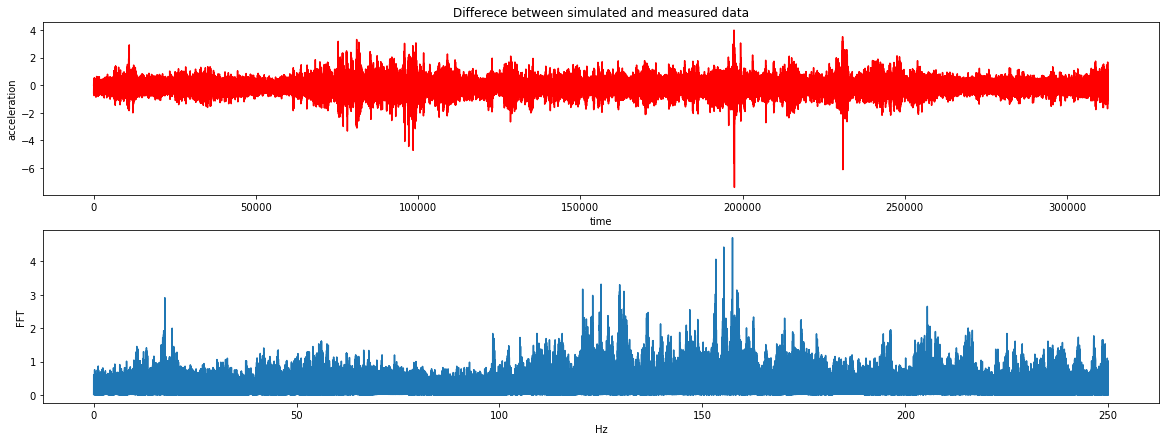

In [215]:
sr = 500 # sampling rate (Hz)
X3 = scipy.fft.fft(s3) # fft performed
n3 = np.arange(len(X3)) #length of fft
T3 = len(X3)/sr # sampling period
x_freq3 = n3/T3

plt.figure(figsize=(20, 7))
plt.subplot(2, 1, 1)
plt.plot(s3, 'r')
plt.xlabel("time")
plt.ylabel("acceleration")
plt.title("Differece between simulated and measured data")

plt.subplot(2, 1, 2)
plt.plot(x_freq3[:len(X3)//2+1], np.abs(X3[:len(X3)//2+1]))
plt.xlabel("Hz")
plt.ylabel("FFT")
plt.show()


#### Conclusion
***If the model was a proper description of the data generating system the residuals should have been purely random white noise. Thus comparing modeled and simulated data by subtraction, and using FFT on the difference, it was expected to
see a flat frequency spectrum; where the energy and therefore information content would have been evenly distributed across the frequencies.***

### This could mean that the track has many deformations along the path and requires maintenece.

Reference:
1. [FFT in python](http://localhost:8888/notebooks/IIA1420%20FFT%20in%20Python-1.ipynb)
2. [Assignment 1 Railroad predictive maintenance.pdf](https://usn.instructure.com/courses/27642/files/2479907?wrap=1)